## This notebook contains demo solution of Task 1  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from task1.utils.data_loader import load_mnist_data

### Explore MNIST dataset

In [2]:
X_train, y_train, X_test, y_test = load_mnist_data()

In [3]:
def show_row(data, label):
    img = data.reshape([28, 28])

    plt.figure(figsize=(3,3))
    plt.imshow(img, cmap='Greys_r') # reversed colour for better visibility
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

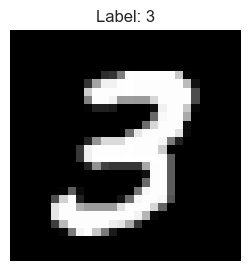

In [4]:
row = 7
show_row(X_train[row], y_train[row])

In [5]:
def visualise(data, labels):
    plt.figure(figsize=(15, 5))

    num_rows_to_show = 10
    row_nums = np.random.randint(data.shape[0], size=num_rows_to_show)
    
    for i, row_num in enumerate(row_nums):
        img = data[row_num].reshape([28, 28])
        label = labels[row_num]
    
        plt.subplot(1, num_rows_to_show, i + 1)
        plt.imshow(img, cmap='Greys_r')
        plt.title(f'Label: {label}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

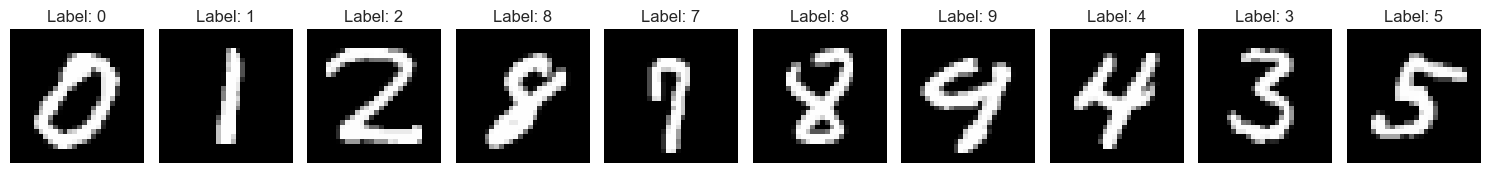

In [6]:
visualise(X_train, y_train)

### Model Training

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, test_y, predictions):
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions, average='weighted')
    recall = recall_score(test_y, predictions, average='weighted')
    f1 = f1_score(test_y, predictions, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    cm = confusion_matrix(test_y, predictions)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.show()

In [8]:
from task1.models.mnist_classifier import MnistClassifier

### Random Forest

In [9]:
rf = MnistClassifier(algorithm='rf')
rf.train(X_train, y_train)

### CNN

In [10]:
cnn = MnistClassifier(algorithm='cnn')
cnn.train(X_train, y_train)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9070 - loss: 0.2986
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9857 - loss: 0.0457
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9904 - loss: 0.0314
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9940 - loss: 0.0203
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9951 - loss: 0.0139


### FNN

In [11]:
fnn = MnistClassifier(algorithm='nn')
fnn.train(X_train, y_train)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8789 - loss: 0.4215
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9694 - loss: 0.1020
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9797 - loss: 0.0662
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9844 - loss: 0.0495
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9867 - loss: 0.0395


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


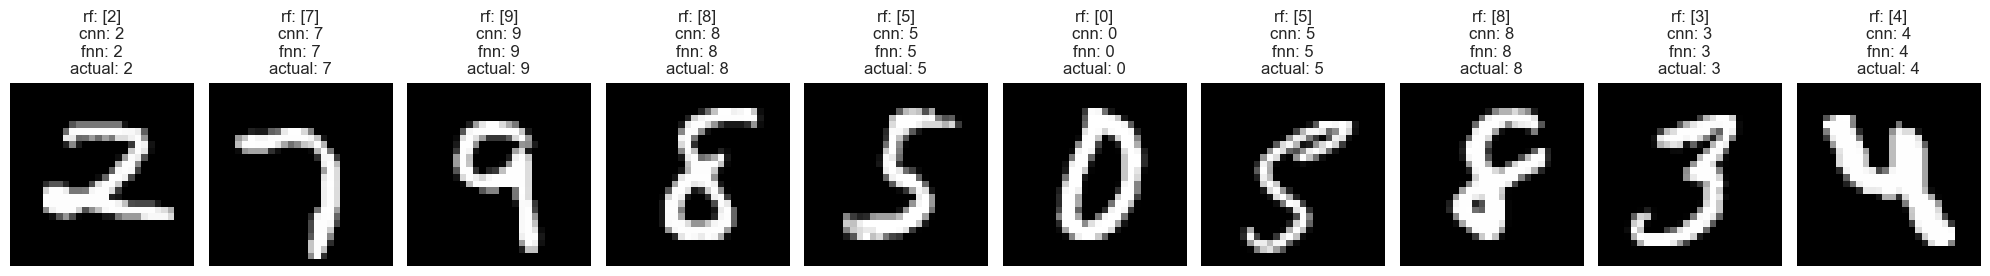

In [13]:
num_rows_to_show = 10
row_nums = np.random.randint(len(X_test), size=num_rows_to_show)

plt.figure(figsize=(num_rows_to_show * 2, 4))

for i, row_num in enumerate(row_nums):
    row = X_test[row_num]

    cnn_pred = cnn.predict(row)
    rf_pred = rf.predict(row)
    fnn_pred = fnn.predict(row)

    img = row.reshape([28, 28])
    true_label = y_test[row_num]
    
    plt.subplot(1, num_rows_to_show, i + 1)
    plt.imshow(img, cmap='Greys_r')
    plt.title(f'rf: {rf_pred}\n'
              f'cnn: {cnn_pred}\n'
              f'fnn: {fnn_pred}\n'
              f'actual: {true_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()